In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [82]:
df = pd.read_csv("processed_afl_dataset.csv")

In [83]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [84]:
df.head()

,GM,KI,MK,HB,DI,GL,BH,HO,TK,RB,...,FF,FA,BR,CP,UP,CM,MI,1%,BO,GA
0,1,14.956522,3.565217,17.782609,32.739130,0.217391,0.347826,0.0,5.478261,1.826087,...,1.565217,1.173913,1.086957,17.782609,15.565217,0.043478,0.043478,1.739130,0.130435,0.826087
1,1,13.840000,3.840000,16.120000,29.960000,0.440000,0.320000,0.0,4.520000,1.560000,...,1.760000,0.920000,1.120000,16.000000,14.000000,0.280000,0.280000,0.960000,0.520000,0.560000
2,1,14.869565,4.173913,15.782609,30.652174,0.173913,0.173913,0.0,3.782609,1.739130,...,1.391304,0.739130,0.478261,11.608696,20.000000,0.086957,0.130435,2.173913,0.173913,0.782609
3,1,14.750000,4.666667,14.583333,29.333333,0.500000,0.500000,0.0,6.208333,2.125000,...,1.458333,1.291667,1.041667,9.041667,19.708333,0.041667,0.208333,1.833333,0.166667,0.458333
4,1,14.875000,4.166667,13.166667,28.041667,0.791667,1.291667,0.0,3.125000,1.458333,...,0.666667,0.708333,1.000000,12.708333,15.666667,0.166667,0.791667,0.666667,0.000000,1.166667


In [85]:
cleaned = df[['HB','DI','IF','CL','CP','BR']]

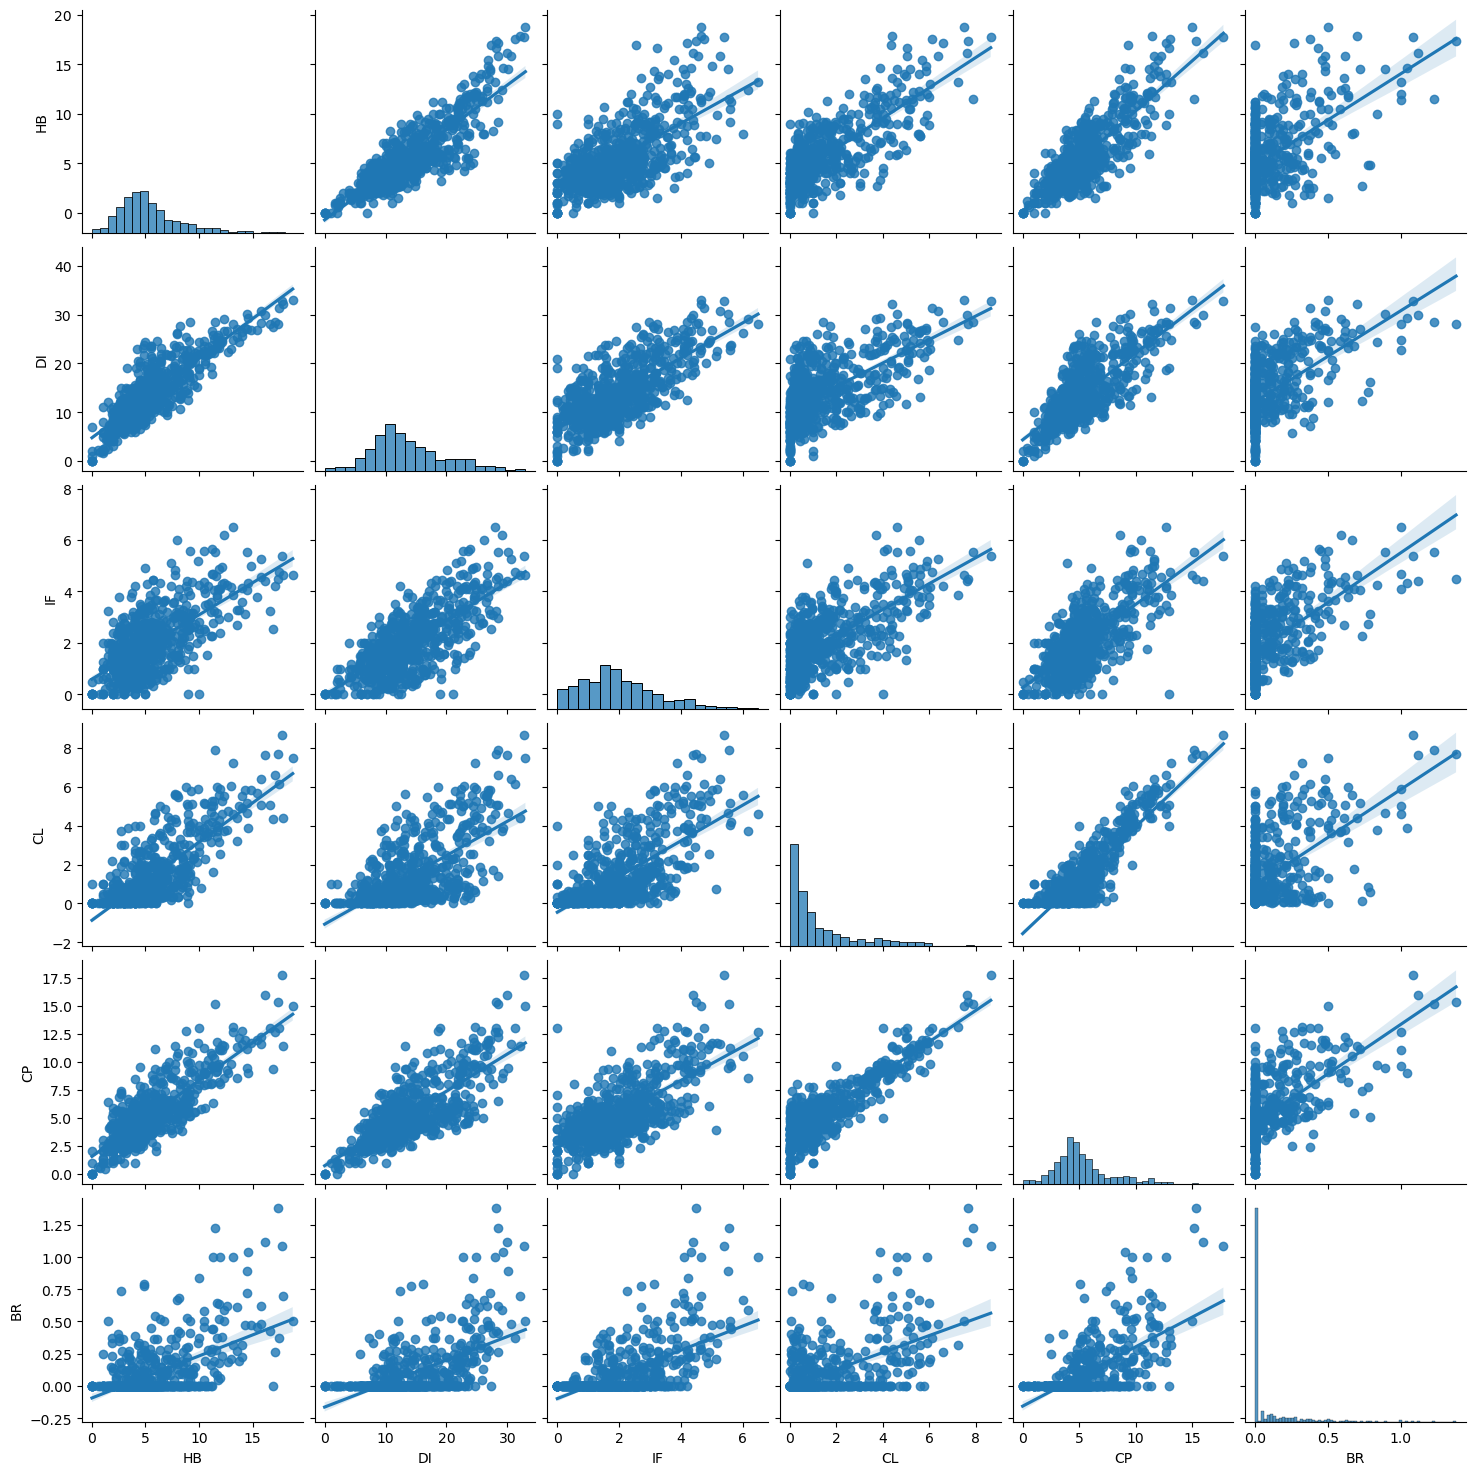

In [86]:
sns.pairplot(cleaned, kind = 'reg')
plt.show()

**Analyse**

Pairplot mainly shows the relationship between two variables (linear or nonlinear, whether there is an obvious correlation). We can clearly see that CP has a linear relationship with some data.
For CP, the data distribution has a linear relationship with the other four feature columns
All the other models show a normal distribution trend, except that CL shows an exponential function distribution. It can be seen that the diagonal is the histogram (distribution diagram) of each attribute, while the non-diagonal is the correlation diagram between two different attributes. From the figure, we find that HB and CP have obvious correlation with the other five features.

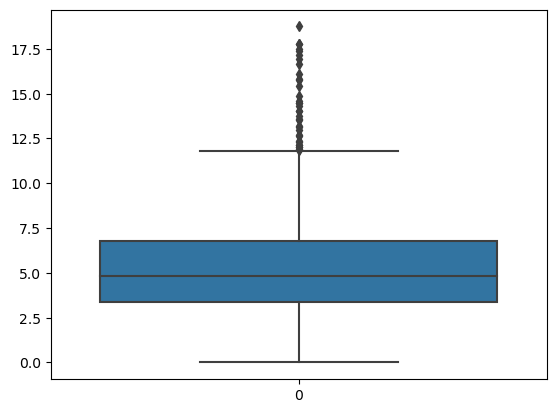

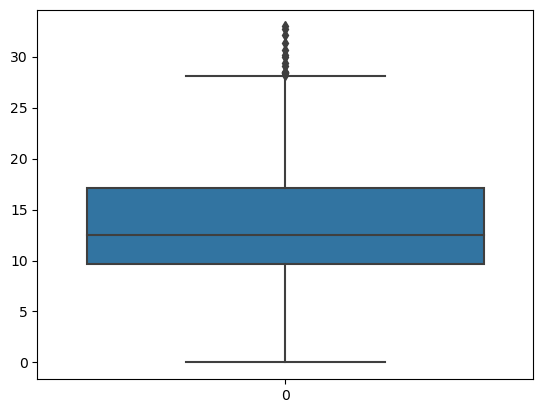

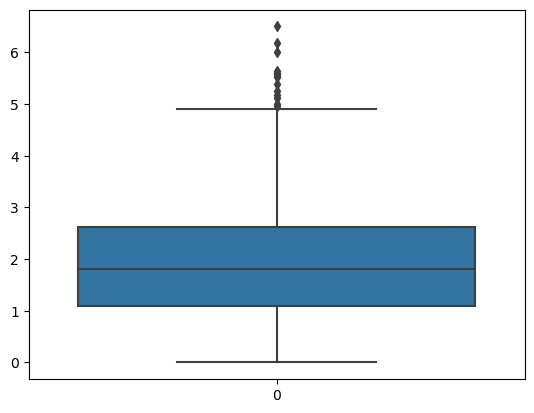

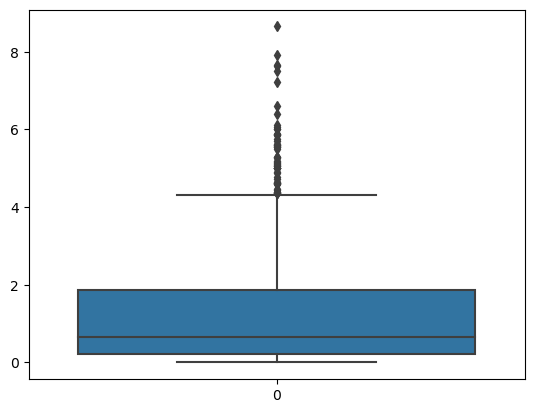

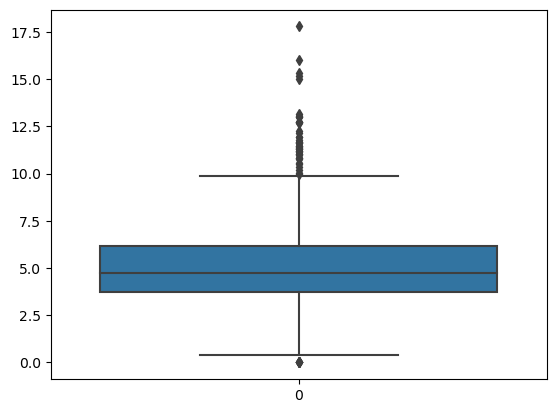

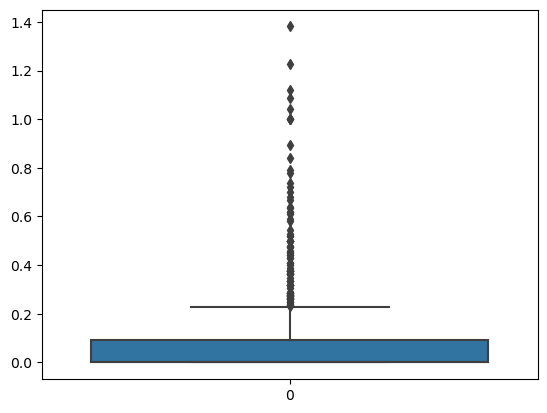

In [87]:
for c in cleaned.columns:
    sns.boxplot(cleaned[c])
    plt.show()

Boxplot mainly embodies a standardized method of displaying data distribution based on five-digit summaries (" minimum, "first quartile (Q1), median, third quartile (Q3), and" maximum ")
For each feature, there are more or less outliers. It can be seen that BR has too many outliers, too many 0's are filled in, and more than 0.2 are all outliers, which is inevitable in the rule of Brownlow votes

**limitation**：We have not processed discrete values. Due to the problem of data scale, if we remove all discrete values, the data scale of this model will be reduced by more than 60 percent, which may cause this data to lose the significance of analysis. Voting is the result of multiple votes, which is classified data. This dataset could not obtain the data of separate votes. In addition, objective factors of voting also had a lot of influence on the data, such as the popularity of the team and the opponent faced by the team members, which would affect their brownlow votes.


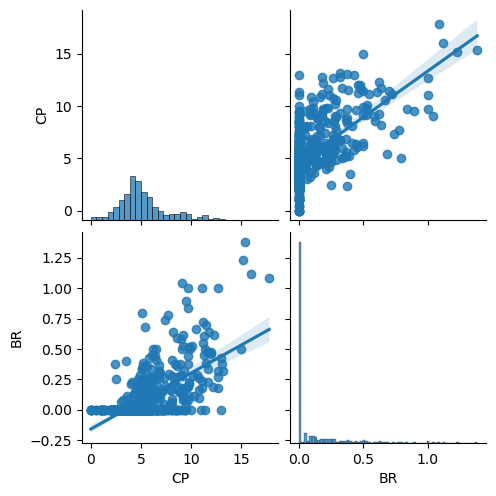

In [88]:
sns.pairplot(cleaned[['CP','BR']], kind = 'reg')
plt.show()

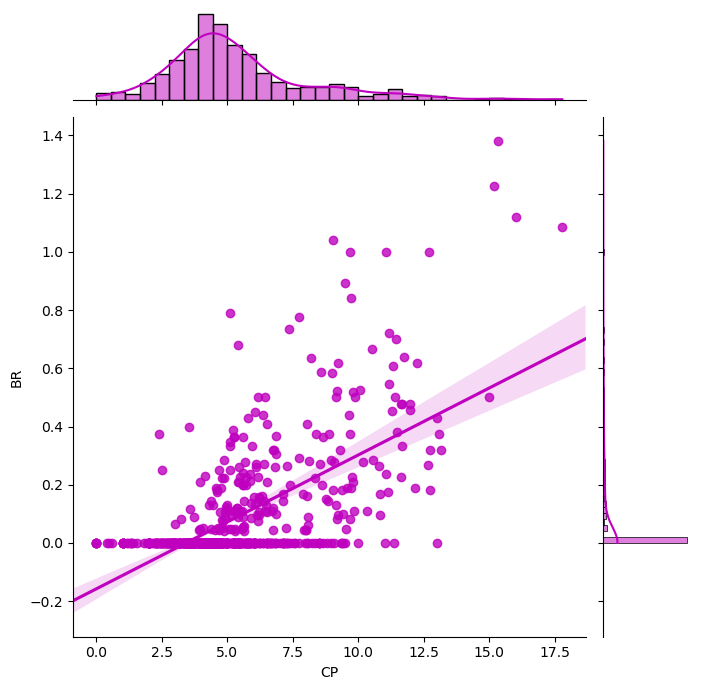

In [89]:
g = sns.jointplot(x="CP", y="BR", data=cleaned,
                  kind="reg", truncate=False,
                  color="m", height=7)

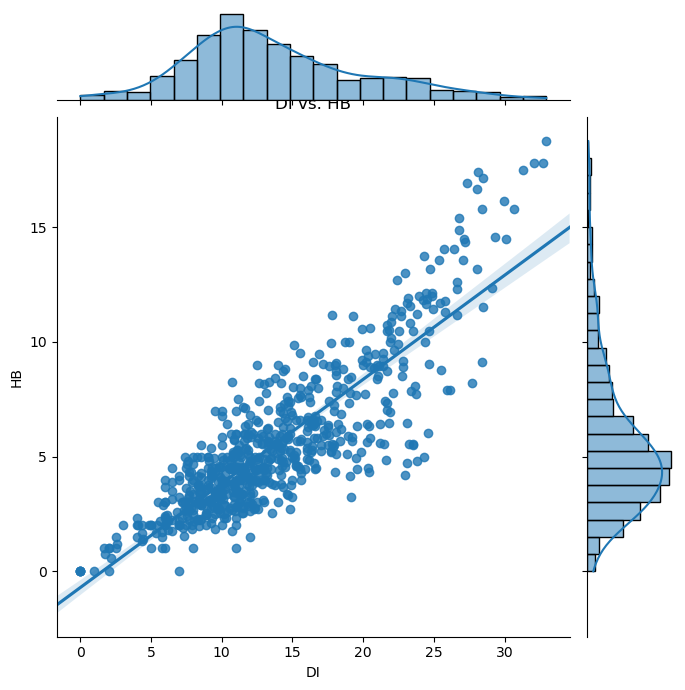

In [90]:
g = sns.jointplot(x="DI", y="HB", data=cleaned,
                  kind="reg", truncate=False, height=7)
plt.title("DI vs. HB")
plt.show()

In [91]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
X, y = np.array(list(cleaned['DI'])).reshape(-1, 1), np.array(list(cleaned['HB'])).reshape(-1, 1)
lr.fit(X,y)
y_pred = lr.predict(X)

In [92]:
lr.intercept_, lr.coef_

(array([-0.70810048]), array([[0.45362324]]))

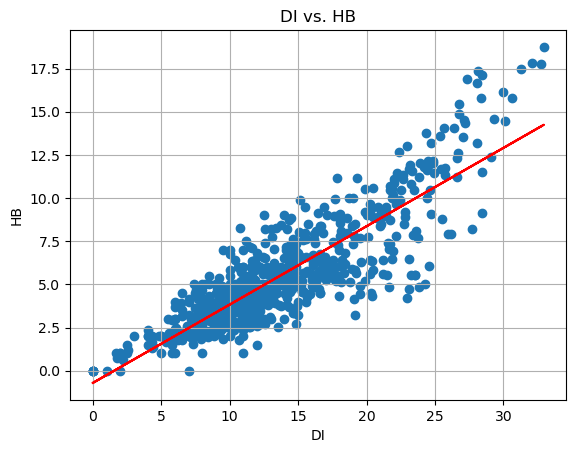

In [93]:
plt.scatter(cleaned['DI'], cleaned['HB'])
plt.plot(X, y_pred, color = 'Red')
plt.grid(True)
plt.xlabel('DI')
plt.ylabel('HB')
plt.title('DI vs. HB')
plt.show()